In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import warnings

warnings.filterwarnings("ignore")

In [92]:
data = pd.read_excel("dmv.xlsx")
data
data['Results'] = data['Results'].apply(lambda x: not x)

Text(0, 0.5, 'DMV Test 2')

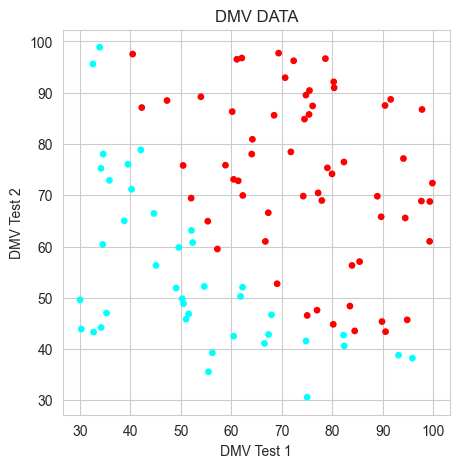

In [93]:
# Plot data using "Results" as a color threshold
colors = ['red', 'green', 'yellow', 'cyan']  # other colors: 'green', 'yellow', 'blue', 'purple', 'pink', 'orange'
plt.figure(figsize=(5, 5))
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Results'],
            cmap=mcolors.ListedColormap(colors), s=15)
plt.title("DMV DATA")
plt.xlabel("DMV Test 1")
plt.ylabel("DMV Test 2")

In [94]:
data_to_cluster = data[["DMV_Test_1", 'DMV_Test_2']]  # Only take the test numbers, drop result
data_to_cluster

,DMV_Test_1,DMV_Test_2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [95]:
k_means = KMeans(n_clusters=4, random_state=42)

In [96]:
k_means.fit(data_to_cluster)

KMeans(n_clusters=4, random_state=42)

In [97]:
k_means.labels_

array([1, 1, 1, 0, 3, 1, 0, 2, 0, 2, 2, 2, 3, 0, 1, 0, 2, 2, 0, 2, 2, 3,
       1, 1, 3, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 3, 2,
       1, 1, 3, 3, 0, 3, 3, 3, 2, 1, 1, 1, 3, 0, 3, 0, 0, 1, 1, 1, 1, 2,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 3, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 3, 1, 0, 2, 2, 0, 3, 1, 0])

In [98]:
data['KMeans_labels'] = k_means.labels_

In [99]:
data.head()

,DMV_Test_1,DMV_Test_2,Results,KMeans_labels
0,34.623660,78.024693,True,1
1,30.286711,43.894998,True,1
2,35.847409,72.902198,True,1
3,60.182599,86.308552,False,0
4,79.032736,75.344376,False,3


Text(0, 0.5, 'DMV Test 2')

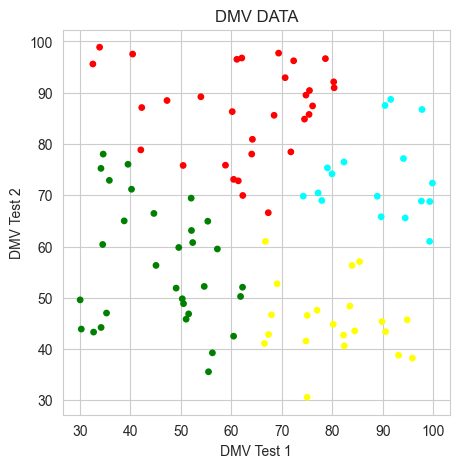

In [100]:
# Plot data using Kmeans Cluster as a color threshold
plt.figure(figsize=(5, 5))
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['KMeans_labels'],
            cmap=mcolors.ListedColormap(colors), s=15)
plt.title("DMV DATA")
plt.xlabel("DMV Test 1")
plt.ylabel("DMV Test 2")

In [101]:
agglo_model = AgglomerativeClustering(n_clusters=4)
agglo_model.fit(data_to_cluster)
data['Agglo_labels'] = agglo_model.labels_
data['Agglo_labels'] = data['Agglo_labels'].apply(lambda x: not x)
data

,DMV_Test_1,DMV_Test_2,Results,KMeans_labels,Agglo_labels
0,34.623660,78.024693,True,1,False
1,30.286711,43.894998,True,1,False
2,35.847409,72.902198,True,1,False
3,60.182599,86.308552,False,0,False
4,79.032736,75.344376,False,3,False
...,...,...,...,...,...
95,83.489163,48.380286,False,2,True
96,42.261701,87.103851,False,0,False
97,99.315009,68.775409,False,3,False
98,55.340018,64.931938,False,1,False


Text(0, 0.5, 'DMV Test 2')

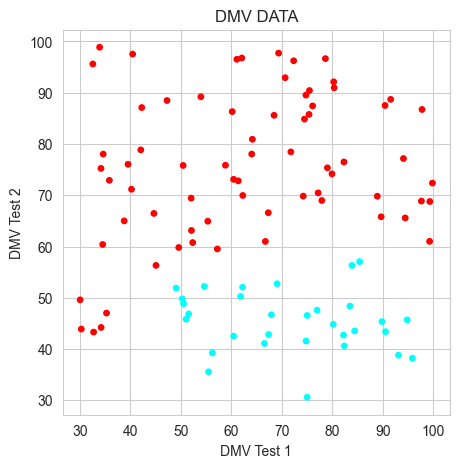

In [102]:
plt.figure(figsize=(5, 5))
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Agglo_labels'],
            cmap=mcolors.ListedColormap(colors), s=15)
plt.title("DMV DATA")
plt.xlabel("DMV Test 1")
plt.ylabel("DMV Test 2")

In [103]:
data.head()

,DMV_Test_1,DMV_Test_2,Results,KMeans_labels,Agglo_labels
0,34.623660,78.024693,True,1,False
1,30.286711,43.894998,True,1,False
2,35.847409,72.902198,True,1,False
3,60.182599,86.308552,False,0,False
4,79.032736,75.344376,False,3,False


In [104]:
(data['Results'] == data['KMeans_labels']).value_counts()

True     56
False    44
Name: count, dtype: int64

In [105]:
(data['Results'] == data['Agglo_labels']).value_counts()

True     69
False    31
Name: count, dtype: int64

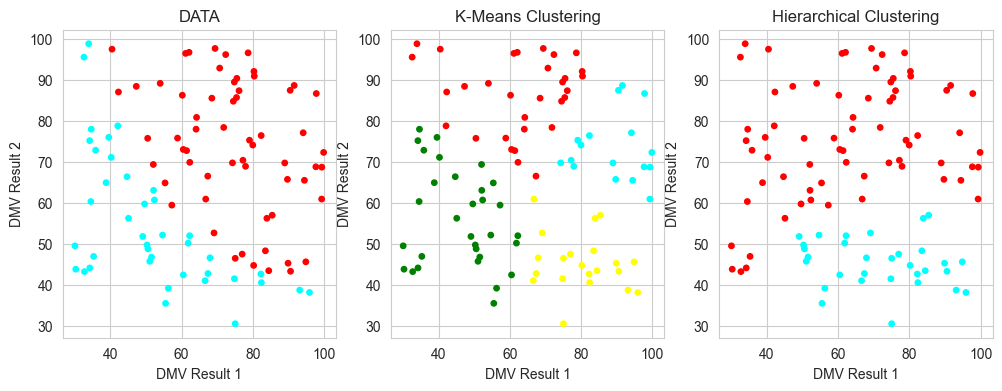

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Results'],
              cmap=mcolors.ListedColormap(colors), s=15)
ax[0].set_title("DATA")
ax[0].set_ylabel('DMV Result 2')
ax[0].set_xlabel('DMV Result 1')

ax[1].scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['KMeans_labels'],
              cmap=mcolors.ListedColormap(colors), s=15)
ax[1].set_title('K-Means Clustering')
ax[1].set_ylabel('DMV Result 2')
ax[1].set_xlabel('DMV Result 1')

ax[2].scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Agglo_labels'],
              cmap=mcolors.ListedColormap(colors), s=15)
ax[2].set_title('Hierarchical Clustering')
ax[2].set_ylabel('DMV Result 2')
ax[2].set_xlabel('DMV Result 1')
plt.show()

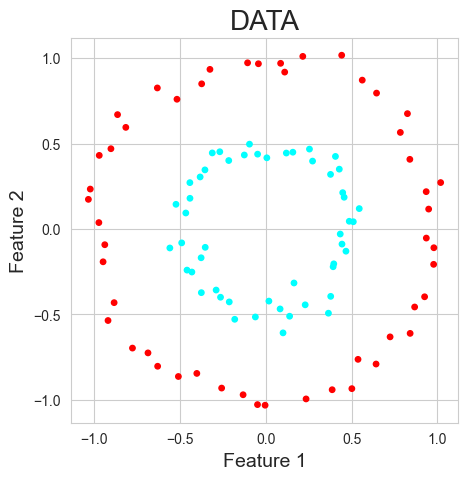

In [107]:
from sklearn.datasets import make_circles

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05, factor=.5)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))
#df.head()
plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=df['label'], cmap=mcolors.ListedColormap(colors), s=15)
plt.title('DATA', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

In [108]:
colors = ['red', 'green', 'blue', 'yellow']

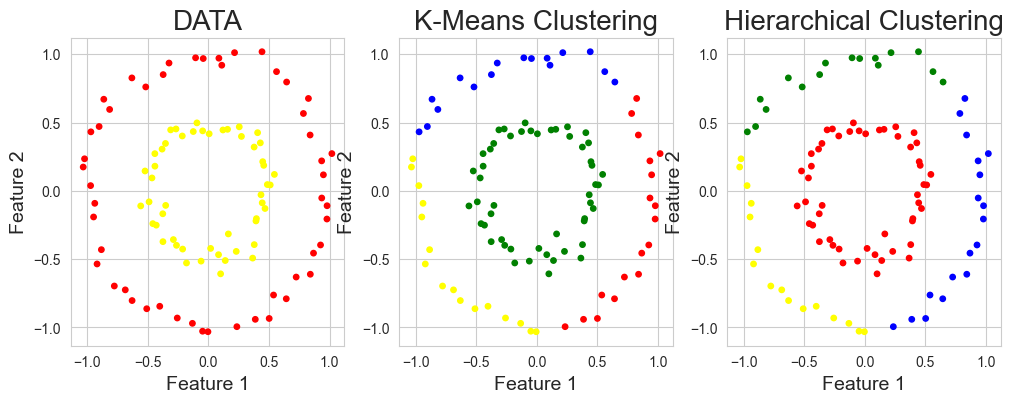

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].scatter(df['x'], df['y'], c=df['label'], cmap=mcolors.ListedColormap(colors), s=15)
ax[0].set_title('DATA', fontsize=20)
ax[0].set_xlabel('Feature 1', fontsize=14)
ax[0].set_ylabel('Feature 2', fontsize=14)

k_means.fit(df)
df['KMeans_labels'] = k_means.labels_

ax[1].scatter(df['x'], df['y'], c=df['KMeans_labels'], cmap=mcolors.ListedColormap(colors), s=15)
ax[1].set_title('K-Means Clustering', fontsize=20)
ax[1].set_xlabel('Feature 1', fontsize=14)
ax[1].set_ylabel('Feature 2', fontsize=14)

agglo_model.fit(df)
df["Agglo_labels"] = agglo_model.labels_

ax[2].scatter(df['x'], df['y'], c=df['Agglo_labels'], cmap=mcolors.ListedColormap(colors), s=15)
ax[2].set_title('Hierarchical Clustering', fontsize=20)
ax[2].set_xlabel('Feature 1', fontsize=14)
ax[2].set_ylabel('Feature 2', fontsize=14)

plt.show()

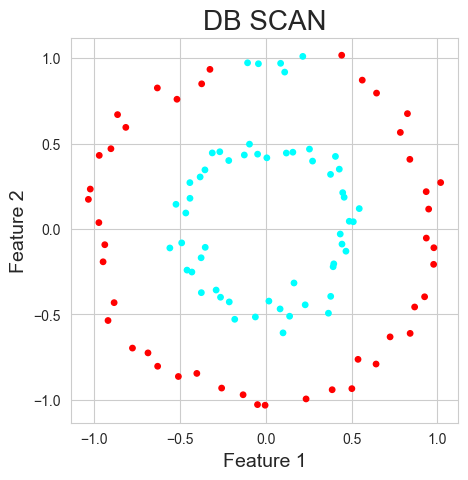

In [110]:
density_scan = DBSCAN(eps=.2, min_samples=5)
density_scan.fit(df[['x', 'y']])
df['DBSCAN_labels'] = density_scan.labels_

colors = ['red', 'cyan']

plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=df['DBSCAN_labels'], cmap=mcolors.ListedColormap(colors), s=15)
plt.title('DB SCAN', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

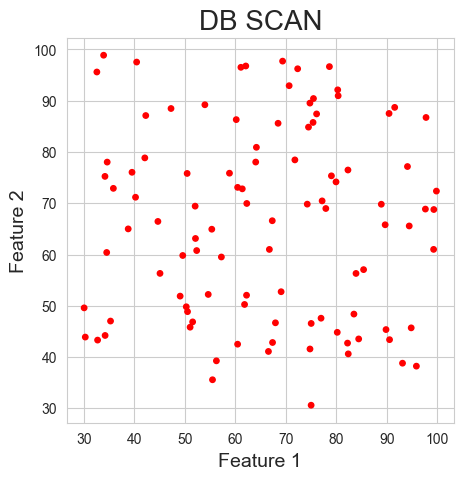

In [111]:
density_scan = DBSCAN(eps=.2, min_samples=5)
density_scan.fit(data[['DMV_Test_1', 'DMV_Test_2']])

data['DBSCAN_labels'] = density_scan.labels_

colors = ['red', 'cyan', 'orange', 'green', 'yellow', 'blue', 'pink']

plt.figure(figsize=(5, 5))
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['DBSCAN_labels'], cmap=mcolors.ListedColormap(colors), s=15)
plt.title('DB SCAN', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()